In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [2]:
import random
import pandas as pd 
import numpy as np

id_1 = 7479 #change to first student id
id_2 = 7839 #change to second student id
id_3 = 0000 #change to third student id "leave 0000 if team of 2"
random_seed = id_1+id_2+id_3
random.seed(random_seed)
data_path="data.csv"#replace with data path
output_path="your_data.csv"#replace with output data path

all_data=pd.read_csv(data_path) 
all_columns = all_data.columns.tolist()

target_column = 'smoking'  

all_columns.remove(target_column)

selected_columns = random.sample(all_columns, 10)

print(selected_columns) #MUST BE PRINTED
selected_columns = np.append(selected_columns, target_column)
sample_df = all_data[selected_columns].copy()
sample_df.to_csv(output_path)   #From HERE YOU CAN SPLIT FOR TRAIN ,VALID AND TEST
df=sample_df

['fasting blood sugar', 'serum creatinine', 'Urine protein', 'age', 'weight(kg)', 'Cholesterol', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'triglyceride']


In [3]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=df.iloc[:,0:10]
Y=df.iloc[:,-1]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


model_before = RandomForestClassifier(random_state=42)
model_before.fit(X_train, y_train)
y_pred_before = model_before.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)

In [77]:
# computes the mean of each feature and fills missing values with these means

imputer = SimpleImputer(strategy='mean')
df_scaled= imputer.fit_transform(df.iloc[:,0:10])
df_scaled
df_scaled = pd.DataFrame(df_scaled, columns=df.iloc[:,0:10].columns)
df_scaled.head()
df = pd.concat([df_scaled, df.iloc[:,-1]], axis=1)
df

,Cholesterol,triglyceride,age,hearing(right),hemoglobin,LDL,dental caries,systolic,hearing(left),eyesight(left),smoking
0,172.0,300.0,55.0,1.0,16.5,75.0,0.0,135.0,1.0,0.5,1
1,194.0,55.0,70.0,2.0,16.2,126.0,1.0,146.0,2.0,0.6,0
2,178.0,197.0,20.0,1.0,17.4,93.0,0.0,118.0,1.0,0.4,1
3,180.0,203.0,35.0,1.0,15.9,102.0,1.0,131.0,1.0,1.5,0
4,155.0,87.0,30.0,1.0,15.4,93.0,0.0,121.0,1.0,1.5,1
...,...,...,...,...,...,...,...,...,...,...,...
159251,238.0,47.0,40.0,1.0,14.5,159.0,0.0,127.0,1.0,1.5,0
159252,213.0,202.0,50.0,1.0,14.5,108.0,0.0,120.0,1.0,1.0,0
159253,189.0,45.0,40.0,1.0,10.9,93.0,0.0,114.0,1.0,1.5,0
159254,165.0,148.0,50.0,1.0,14.4,80.0,0.0,121.0,1.0,1.2,1


In [78]:
# outliers 
df_describe = df.describe()

q1 = df_describe.loc['25%']
q3 = df_describe.loc['75%']

iqr = q3 - q1
# Define the lower and upper bounds
threshold=1.5
lower_bound = q1 - threshold * iqr
upper_bound = q3 + threshold * iqr

df = df[(df>= lower_bound) & (df<= upper_bound)]
df = df.dropna()
df = df.reset_index(drop=True)
df   
# sns.boxplot(df[selected_columns[0]])

,Cholesterol,triglyceride,age,hearing(right),hemoglobin,LDL,dental caries,systolic,hearing(left),eyesight(left),smoking
0,178.0,197.0,20.0,1.0,17.4,93.0,0.0,118.0,1.0,0.4,1
1,155.0,87.0,30.0,1.0,15.4,93.0,0.0,121.0,1.0,1.5,1
2,222.0,153.0,45.0,1.0,13.0,122.0,0.0,150.0,1.0,1.5,0
3,243.0,163.0,40.0,1.0,15.7,150.0,0.0,130.0,1.0,0.7,1
4,183.0,27.0,40.0,1.0,13.2,122.0,0.0,105.0,1.0,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...
116053,238.0,47.0,40.0,1.0,14.5,159.0,0.0,127.0,1.0,1.5,0
116054,213.0,202.0,50.0,1.0,14.5,108.0,0.0,120.0,1.0,1.0,0
116055,189.0,45.0,40.0,1.0,10.9,93.0,0.0,114.0,1.0,1.5,0
116056,165.0,148.0,50.0,1.0,14.4,80.0,0.0,121.0,1.0,1.2,1


In [79]:

# numerical values univariate to make mean = 0 and standard deviation = 1
# NORMALIZATION
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:,0:10])
df_scaled = pd.DataFrame(df_scaled, columns=df.iloc[:,0:10].columns)
df_scaled
df = pd.concat([df_scaled, df.iloc[:,-1]], axis=1)
df

,Cholesterol,triglyceride,age,hearing(right),hemoglobin,LDL,dental caries,systolic,hearing(left),eyesight(left),smoking
0,-0.638669,1.224884,-2.138856,0.0,1.934314,-0.851303,0.0,-0.316481,0.0,-2.085064,1
1,-1.458131,-0.607236,-1.258557,0.0,0.449794,-0.851303,0.0,-0.070847,0.0,1.691857,1
2,0.928997,0.492036,0.061892,0.0,-1.331630,0.276542,0.0,2.303615,0.0,1.691857,0
3,1.677201,0.658593,-0.378257,0.0,0.672472,1.365495,0.0,0.666055,0.0,-1.054995,1
4,-0.460525,-1.606574,-0.378257,0.0,-1.183178,0.276542,0.0,-1.380895,0.0,1.691857,0
...,...,...,...,...,...,...,...,...,...,...,...
116053,1.499057,-1.273461,-0.378257,0.0,-0.218240,1.715515,0.0,0.420421,0.0,1.691857,0
116054,0.608338,1.308163,0.502042,0.0,-0.218240,-0.267935,0.0,-0.152725,0.0,-0.024925,0
116055,-0.246753,-1.306773,-0.378257,0.0,-2.890376,-0.851303,0.0,-0.643993,0.0,1.691857,0
116056,-1.101843,0.408758,0.502042,0.0,-0.292466,-1.356888,0.0,-0.070847,0.0,0.661788,1


['age', 'weight(kg)', 'serum creatinine', 'Cholesterol', 'triglyceride', 'eyesight(left)']
6


<AxesSubplot:>

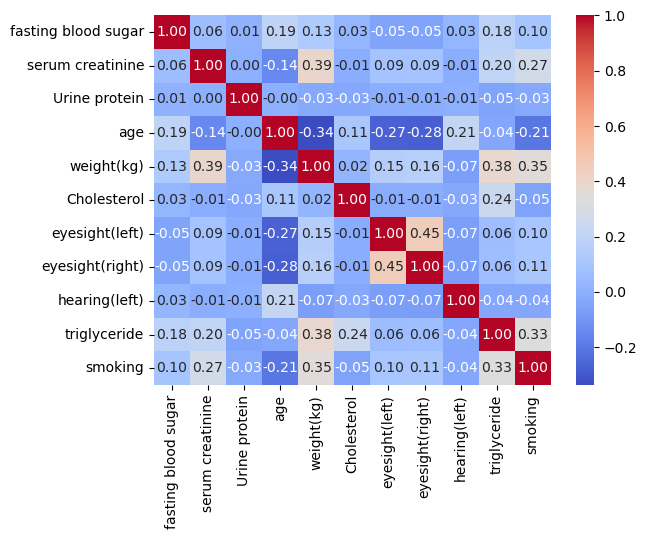

In [108]:
# to know the features that have a correlation with smoking feature and that the value is greater than the threshold
correlation_matrix = df.corr()
correlation_matrix
threshold=0.2
correlation_mask = (correlation_matrix> threshold)
selected_features = []
for column in correlation_matrix.columns:
    correlated_features = correlation_matrix.index[correlation_mask[column]]
    if len(correlated_features) > 1:
        selected_feature = correlated_features[0]
        selected_features.append(selected_feature)
correlated_features = correlation_matrix.index[correlation_mask["smoking"]].drop("smoking").tolist()
selected_features.extend(correlated_features)
selected_features = list(set(selected_features))
print(selected_features)
print(len(selected_features))
df_scaled = pd.concat([df[selected_features], df.iloc[:,-1]], axis=1)
df_scaled
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [106]:
# When you set n_components to a number less than the original number of features, PCA will perform dimensionality reduction
#  by retaining the most important components, and the transformed data will have fewer dimensions. This can be useful for 
# visualization, noise reduction, or speeding up machine learning algorithms.PCA helps in reducing the number of features (dimensions) in a dataset while retaining as much information as possible.
# THE row represents a principal component, and columns correspond to the original features.
# in transformed_featurses row corresponds to a sample in your dataset, and the columns represent the new features 
lenn=len(selected_features)
pca = PCA(n_components=6)
transformed_features = pca.fit_transform(df_scaled.iloc[:,0:lenn])
transformed_features = pd.DataFrame(transformed_features)
transformed_features

# plt.scatter(transformed_features[:, 0], transformed_features[:, 1])
# plt.title('PCA Transformed Features')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()


,0,1,2,3,4,5
0,167.148197,-42.497204,-25.894545,-5.734004,-0.424007,0.119582
1,-72.426607,8.550699,-15.341547,19.674653,-0.169235,0.239183
2,67.265088,-27.781848,16.884319,-14.195804,-0.837808,-0.141653
3,74.825936,-26.605271,19.557867,10.281281,0.352581,-0.060145
4,-45.581749,-36.198475,4.806257,-12.596393,0.394356,-0.065875
...,...,...,...,...,...,...
159251,-76.289580,52.092626,-3.350828,-15.621238,0.508157,0.034412
159252,76.256836,8.299348,-2.238258,5.835760,0.010269,-0.341683
159253,-83.839868,3.571011,-3.743201,-11.322745,0.499392,-0.199971
159254,16.986617,-32.894523,-2.543114,8.999304,0.229612,0.155420


In [107]:
# lenn=len(selected_features)
# X=df_scaled.iloc[:,0:lenn]
Y=df_scaled.iloc[:,-1]
X=transformed_features
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

model_after = RandomForestClassifier(random_state=42)
model_after.fit(X_train, y_train)
y_pred_after = model_after.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred_after)
print(f"Accuracy Before Feature Modification: {accuracy_before}")
print(f"Accuracy After Feature Modification: {accuracy_after}")

Accuracy Before Feature Modification: 0.7379437374413932
Accuracy After Feature Modification: 0.7059611520428667


In [85]:
# ENSEMBLE->COMBINING MULTIPLE MODELS
# Bagging (Bootstrap Aggregating)
import numpy as np
from sklearn.tree import DecisionTreeClassifier
# from scipy.stats import mode
from statistics import mode
def generate_bootstrap_sample(data, labels):
    # row sampling
    indices = np.random.choice(len(data), len(data), replace=True)
    return data.iloc[indices], labels.iloc[indices]

def bootstrap_aggregation(data, labels, num_models):
    models = []

    for _ in range(num_models):
        # Generate a bootstrap sample
        bootstrap_data, bootstrap_labels = generate_bootstrap_sample(data, labels)

        # Train a base learner (e.g., Decision Tree) on the bootstrap sample
        base_learner = DecisionTreeClassifier()
        base_learner.fit(bootstrap_data, bootstrap_labels)

        # Add the trained learner to the ensemble
        models.append(base_learner)

    return models

def make_predictions(models, data):
    
    predictions = np.array([model.predict(data) for model in models])
    # Use mode for classification
    average_predictions= np.mean(predictions, axis=0)
    ensemble_predictions = np.round(average_predictions)
    return ensemble_predictions.astype(int)

# Train multiple models using bootstrapping
num_models = 10
trained_models = bootstrap_aggregation(X_train, y_train, num_models)

# Make predictions using the ensemble of models on the test set
ensemble_predictions = make_predictions(trained_models, X_test)

# Print the ensemble predictions
print("Ensemble Predictions:", mode(ensemble_predictions))
accuracy_bagging = accuracy_score(y_test,ensemble_predictions)
print(f"Bagging Accuracy: {accuracy_bagging}")

Ensemble Predictions: 0
Bagging Accuracy: 0.6786145097363433


In [94]:
# Boosting (AdaBoost)
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class AdaBoost:
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples  # Initialize weights uniformly

        for _ in range(self.n_estimators):
            # Train a weak learner (Decision Tree) on the weighted dataset
            model = DecisionTreeClassifier(max_depth=1)
            model.fit(X, y, sample_weight=w)

            # Make predictions
            predictions = model.predict(X)

            # Calculate error
            error = np.sum(w * (predictions != y))

            # Calculate alpha (weight of the weak learner)
            alpha = 0.5 * np.log((1 - error) /error)

            # Update weights
            w = w * np.exp(-alpha* y * predictions)
            # normalization sum =1
            w /= np.sum(w)

            # Save the weak learner and its weight
            self.models.append(model)
            self.alphas.append(alpha)

    def predict(self, X):
        # Combine the predictions of weak learners with weights
        predictions = np.array([model.predict(X) for model in self.models])
        weighted_predictions = np.dot(self.alphas, predictions)
        # Convert to binary predictions (1 if positive, 0 if negative)
        final_predictions = np.sign(weighted_predictions)
        return final_predictions.astype(int)
# n_estimators number of models (weak learner) trained sequentially to form the final model
# low depth leads to unerfit and max depth leads to overfit the data  
ada_boost_model = AdaBoost(n_estimators=50)
ada_boost_model.fit(X_train, y_train)
predictions = ada_boost_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


17409
Accuracy: 0.6817737951634212


In [90]:
# Random Forest
# row sampling and feature sampling 
class RandomForest:
    def __init__(self, n_estimators, max_depth, random_state):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        for _ in range(self.n_estimators):
            sample_indices = np.random.choice(len(X), len(X), replace=True)
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            tree.fit(X.iloc[sample_indices], y.iloc[sample_indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

# Usage
np.random.seed(42)

random_forest_model = RandomForest(n_estimators=10, max_depth=None, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = np.sum(y_pred_rf == y_test) / len(y_test)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.6792463668217589


In [15]:
# ENSEMBLE->COMBINING MULTIPLE MODELS
# Bagging (Bootstrap Aggregating)
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_val, y_val)
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging}")

# Boosting (AdaBoost)
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
boosting_model.fit(X_val, y_val)
y_pred_boosting = boosting_model.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print(f"Boosting Accuracy: {accuracy_boosting}")

# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest_model.fit(X_val, y_val)
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


Bagging Accuracy: 0.6759460817146684
Boosting Accuracy: 0.7125753516409913
Random Forest Accuracy: 0.6880860683188211
